In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [3]:
data = pd.read_csv("csvs/CovidData-Nov.csv")

#load sebagai pandas dataframe
df = pd.DataFrame(data).iloc[:600,:]
df.head()

,Unnamed: 0,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),...,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
0,2-Mar,2,0.0,2.0,2.0,2,100.00%,0,0.0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3-Mar,0,0.0,0.0,2.0,2,100.00%,0,0.0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4-Mar,0,0.0,0.0,2.0,2,100.00%,0,0.0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5-Mar,0,0.0,0.0,2.0,2,100.00%,0,0.0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-Mar,2,0.0,2.0,4.0,4,100.00%,0,0.0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

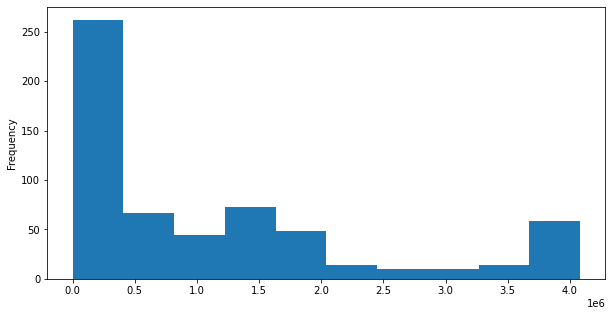

In [4]:
#Visualisasi bagaimana data terdistribusi
plt.figure(figsize = (10, 5))
df['Sembuh'].plot(kind="hist")

In [5]:
# menyingkirkan data yang bukan numerik
#dan melakukan cek korelasi antar data

checkCorrelation = df.iloc[:,1:9]
newData = df[["Total kasus", "Sembuh"]]
checkCorrelation

,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh
0,2,0.0,2.0,2.0,2,100.00%,0,0.0
1,0,0.0,0.0,2.0,2,100.00%,0,0.0
2,0,0.0,0.0,2.0,2,100.00%,0,0.0
3,0,0.0,0.0,2.0,2,100.00%,0,0.0
4,2,0.0,2.0,4.0,4,100.00%,0,0.0
...,...,...,...,...,...,...,...,...
595,903,NaN,NaN,4236287.0,"16,697",0.39%,"1,530",4076541.0
596,914,NaN,NaN,4237201.0,"16,376",0.39%,"1,207",4077748.0
597,633,NaN,NaN,4237834.0,"15,594",0.37%,"1,372",4079120.0
598,760,NaN,NaN,4238594.0,"15,090",0.36%,"1,231",4080351.0


<AxesSubplot:>

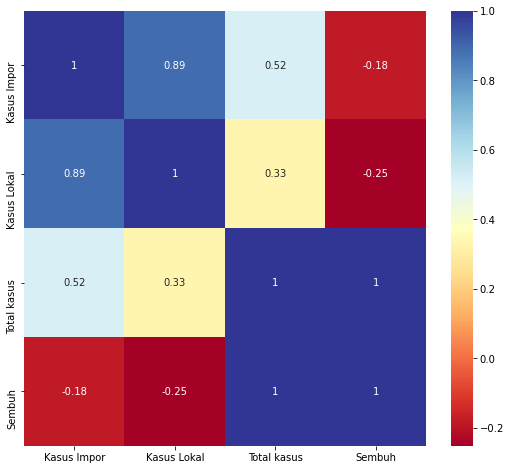

In [6]:
#Pembuktian korelasi antar data

plt.figure(figsize=(9,8))
cor = checkCorrelation.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)

## Melakukan shifting data sembuh sebanyak 7 hari

In [57]:
#Karena korelasi antara total kasus dan sembuh sangat tinggi,
#maka terbukti saling cocok dan dipilih

#Melakukan Shifting data sembuh
#untuk memprediksi angka kesenbuhan 7 hari kedepan

x = pd.DataFrame(df["Total kasus"]).iloc[:593,:]
y = pd.DataFrame(df["Sembuh"]).iloc[7:,:]

selectedData = pd.concat([x.reset_index(),y.reset_index()],axis=1)
selectedData.drop(['index'], axis=1)

,Total kasus,Sembuh
0,2.0,0.0
1,2.0,0.0
2,2.0,3.0
3,2.0,5.0
4,4.0,8.0
...,...,...
588,4229813.0,4076541.0
589,4231046.0,4077748.0
590,4232099.0,4079120.0
591,4233014.0,4080351.0


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(474, 1) (474, 1)
(119, 1) (119, 1)


In [59]:
#Value manual untuk diprediksi
tes = pd.DataFrame([700000,245342,4116890,727122,84882,2000000])

In [60]:
LR = linear_model.LinearRegression()
LR_train = LR.fit(x_train, y_train)
prediction = LR.predict(tes)

In [61]:
prediction[0:10]

array([[ 633139.74684457],
       [ 202473.73777386],
       [3869722.80429345],
       [ 658830.53750043],
       [  50481.10195642],
       [1864539.63817369]])

In [62]:
##Pengujian dengan x_test

In [63]:
LR_train = LR.fit(x_train, y_train)
prediction = LR.predict(x_test)

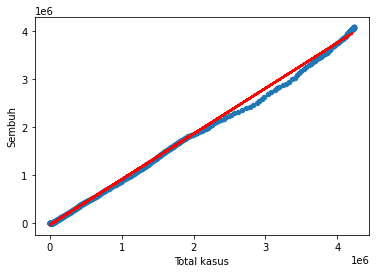

In [64]:
#realData
selectedData.plot(kind='scatter', x='Total kasus', y='Sembuh')

#prediction
plt.plot(x_test, prediction, color='red', linewidth=2)
plt.show()

In [65]:
#Evaluation R2

from sklearn.metrics import r2_score

score = r2_score(y_test, prediction)

print(score)

0.9977480531600715
